<a href="https://colab.research.google.com/github/matheo-angelo/Trabalho-PCD-III/blob/main/PCD_III_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usaremos a Metabolic Network

*Yamanishi, Y. and Vert, J.-P. (2005) Bioinformatics, 21, i468–i477.*


Usaremos uma rede metabólica. Nessa rede, proteínas (mais especificamente, enzimas) são indicadas pelo nome do gene que as codifica e arestas representam interações proteína-proteína.

# Obtendo os dados

In [2]:
!wget https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt # Nome dos genes
!wget https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt # Nome das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/X.txt # Valores das features
!wget https://people.montefiore.uliege.be/schrynemackers/mn/Y.txt # Matriz de adjacências

--2025-05-07 19:19:26--  https://people.montefiore.uliege.be/schrynemackers/mn/gene_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6018 (5.9K) [text/plain]
Saving to: ‘gene_names.txt.1’

gene_names.txt.1    100%[===================>]   5.88K  --.-KB/s    in 0s      

2025-05-07 19:19:26 (308 MB/s) - ‘gene_names.txt.1’ saved [6018/6018]

--2025-05-07 19:19:27--  https://people.montefiore.uliege.be/schrynemackers/ppi/var_names.txt
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989 (3.9K) [text/plain]
Saving to: ‘var_names.txt’

var_names.txt       100%[===================>]   3.90K  -

## Rede de interações

### Carregando os dados:

In [6]:
import numpy as np

# 1. Carregar os nomes dos nós
with open('gene_names.txt', 'r') as f:
    nomes_nos = f.read().splitlines()

# 2. Carregar a matriz de adjacência
matriz_adj = np.loadtxt('Y.txt', delimiter=',')

### Criando o grafo:

In [7]:
import networkx as nx
# Criar o grafo a partir da matriz de adjacência
G = nx.from_numpy_array(matriz_adj)

# Atribuir os nomes aos nós (usando dicionário de mapeamento)
mapping = {i: nome for i, nome in enumerate(nomes_nos)}
G = nx.relabel_nodes(G, mapping)

### Visualizando o grafo:

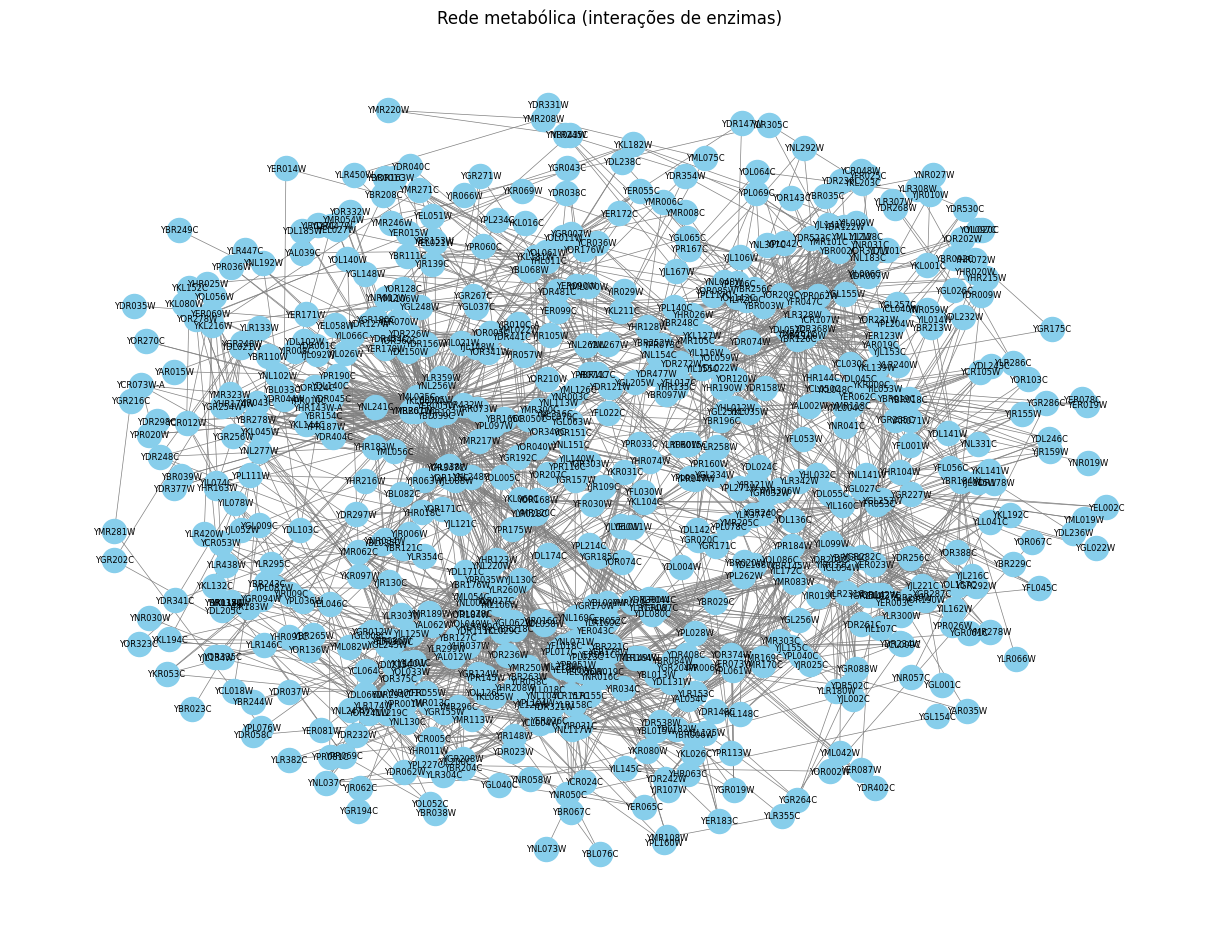

In [26]:
import matplotlib.pyplot as plt

# Configurar plot com zoom
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Ajuste 'k' para espaçamento

nx.draw(G, pos, with_labels=True,
        node_size=300,
        font_size=6,
        node_color='skyblue',
        edge_color='gray',
        width=0.5)

plt.title("Rede metabólica (interações de enzimas)")
plt.show()

## Matriz de features

In [27]:
import pandas as pd
import numpy as np

with open('var_names.txt', 'r') as f:
    colunas = f.read().splitlines()

# Carregar valores - ajuste o delimiter conforme necessário
valores = np.loadtxt('X.txt', delimiter=',')

# Criar DataFrame
matriz_features = pd.DataFrame(valores, columns=colunas)

with pd.option_context('display.max_columns', None):
    display(matriz_features)

,CELL-CELL-CYCLE-ALPHA-FACTOR-1,CELL-CYCLE-ALPHA-FACTOR-2,CELL-CYCLE-ALPHA-FACTOR-3,CELL-CYCLE-ALPHA-FACTOR-4,CELL-CYCLE-ALPHA-FACTOR-5,CELL-CYCLE-ALPHA-FACTOR-6,CELL-CYCLE-ALPHA-FACTOR-7,CELL-CYCLE-ALPHA-FACTOR-8,CELL-CYCLE-ALPHA-FACTOR-9,CELL-CYCLE-ALPHA-FACTOR-10,CELL-CYCLE-ALPHA-FACTOR-11,CELL-CYCLE-ALPHA-FACTOR-12,CELL-CYCLE-ALPHA-FACTOR-13,CELL-CYCLE-ALPHA-FACTOR-14,CELL-CYCLE-ALPHA-FACTOR-15,CELL-CYCLE-ALPHA-FACTOR-16,CELL-CYCLE-ALPHA-FACTOR-17,CELL-CYCLE-ALPHA-FACTOR-18,CELL-CYCLE-CDC15-10M,CELL-CYCLE-CDC15-30M,CELL-CYCLE-CDC15-50M,CELL-CYCLE-CDC15-70M,CELL-CYCLE-CDC15-80M,CELL-CYCLE-CDC15-90M,CELL-CYCLE-CDC15-100M,CELL-CYCLE-CDC15-110M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-120M,CELL-CYCLE-CDC15-130M,CELL-CYCLE-CDC15-140M,CELL-CYCLE-CDC15-150M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-160M,CELL-CYCLE-CDC15-170M,CELL-CYCLE-CDC15-180M,CELL-CYCLE-CDC15-190M,CELL-CYCLE-CDC15-200M,CELL-CYCLE-CDC15-210M,CELL-CYCLE-CDC15-220M,CELL-CYCLE-CDC15-240M,CELL-CYCLE-CDC15-250M,CELL-CYCLE-CDC15-270M,CELL-CYCLE-CDC15-290M,CELL-CYCLE-ELUTRIATION-0.0HRS,CELL-CYCLE-ELUTRIATION-0.5HRS,CELL-CYCLE-ELUTRIATION-1.0HRS,CELL-CYCLE-ELUTRIATION-1.5HRS,CELL-CYCLE-ELUTRIATION-2.0HRS,CELL-CYCLE-ELUTRIATION-2.5HRS,CELL-CYCLE-ELUTRIATION-3.0HRS,CELL-CYCLE-ELUTRIATION-3.5HRS,CELL-CYCLE-ELUTRIATION-4.0HRS,CELL-CYCLE-ELUTRIATION-4.5HRS,CELL-CYCLE-ELUTRIATION-5.0HRS,CELL-CYCLE-ELUTRIATION-5.5HRS,CELL-CYCLE-ELUTRIATION-6.0HRS,CELL-CYCLE-ELUTRIATION-6.5HRS,CELL-CYCLE-CLN3-INDUCTION-30M,CELL-CYCLE-CLN3-INDUCTION-40M,CELL-CYCLE-CLB5-INDUCTION-40M,SPORULATION-0,SPORULATION-30M,SPORULATION-2H,SPORULATION-5H,SPORULATION-7H,SPORULATION-9H,SPORULATION-11H,SPORULATION-2H-,SPORULATION-7H-,SPORULATION-11H-,SPORULATION-NDT80--EARLY,SPORULATION-NDT80--MIDDLE,SPORULATION-NDT80OVER,DIAUXIC-SHIFT-19.0G/L,DIAUXIC-SHIFT-18.7G/L,DIAUXIC-SHIFT-17.6G/L,DIAUXIC-SHIFT-14.0G/L,DIAUXIC-SHIFT-7.5G/L,DIAUXIC-SHIFT-0.2G/L,DIAUXIC-SHIFT-0G/L,CLN3-1,CLN3-2,CLB2-2,CLB2-1,ALPHA0,ALPHA7,ALPHA14,ALPHA21,ALPHA28,ALPHA35,ALPHA42,ALPHA49,ALPHA56,ALPHA63,ALPHA70,ALPHA77,ALPHA84,ALPHA91,ALPHA98,ALPHA105,ALPHA112,ALPHA119,CDC15_10,CDC15_30,CDC15_50,CDC15_70,CDC15_80,CDC15_90,CDC15_100,CDC15_110,CDC15_120,CDC15_130,CDC15_140,CDC15_150,CDC15_160,CDC15_170,CDC15_180,CDC15_190,CDC15_200,CDC15_210,CDC15_220,CDC15_230,CDC15_240,CDC15_250,CDC15_270,CDC15_290,CDC28_0,CDC28_10,CDC28_20,CDC28_30,CDC28_40,CDC28_50,CDC28_60,CDC28_70,CDC28_80,CDC28_90,CDC28_100,CDC28_110,CDC28_120,CDC28_130,CDC28_140,CDC28_150,CDC28_160,ELU0,ELU30,ELU60,ELU90,ELU120,ELU150,ELU180,ELU210,ELU240,ELU270,ELU300,ELU330,ELU360,ELU390,AMBIGUOUS,MITOCHONDRION,VACUOLE,SPINDLE_POLE,CELL_PERIPHERY,PUNCTATE_COMPOSITE,VACUOLAR_MEMBRANE,ER,NUCLEAR_PERIPHERY,ENDOSOME,BUD_NECK,MICROTUBULE,GOLGI,LATE_GOLGI,PEROXISOME,ACTIN 1 NO,NUCLEOLUS,CYTOPLASM,ER_TO_GOLGI,EARLY_GOLGI,LIPID_PARTICLE,NUCLEUS,BUD,PHY-AAE,PHY-AFU,PHY-ANA,PHY-APE,PHY-ATC,PHY-ATH,PHY-ATU,PHY-BAB,PHY-BAN,PHY-BAS,PHY-BBU,PHY-BCE,PHY-BFL,PHY-BHA,PHY-BJA,PHY-BLO,PHY-BME,PHY-BMS,PHY-BSU,PHY-BTH,PHY-BUC,PHY-CAC,PHY-CBU,PHY-CCA,PHY-CCR,PHY-CEF,PHY-CEL,PHY-CGL,PHY-CJE,PHY-CMU,PHY-CPA,PHY-CPE,PHY-CPJ,PHY-CPN,PHY-CPT,PHY-CTC,PHY-CTE,PHY-CTR,PHY-DME,PHY-DRA,PHY-DRE,PHY-ECC,PHY-ECE,PHY-ECJ,PHY-ECO,PHY-ECS,PHY-ECU,PHY-EFA,PHY-FNU,PHY-HAL,PHY-HDU,PHY-HHE,PHY-HIN,PHY-HPJ,PHY-HPY,PHY-HSA,PHY-LIL,PHY-LIN,PHY-LLA,PHY-LMO,PHY-LPL,PHY-MAC,PHY-MBO,PHY-MGA,PHY-MGE,PHY-MJA,PHY-MKA,PHY-MLE,PHY-MLO,PHY-MMA,PHY-MMU,PHY-MPE,PHY-MPN,PHY-MPU,PHY-MTC,PHY-MTH,PHY-MTU,PHY-NEU,PHY-NMA,PHY-NME,PHY-OIH,PHY-PAB,PHY-PAE,PHY-PAI,PHY-PFA,PHY-PFU,PHY-PHO,PHY-PMA,PHY-PMM,PHY-PMT,PHY-PMU,PHY-PPU,PHY-PST,PHY-RBA,PHY-RCO,PHY-RNO,PHY-RPR,PHY-RSO,PHY-SAG,PHY-SAM,PHY-SAN,PHY-SAU,PHY-SAV,PHY-SCE,PHY-SCO,PHY-SEP,PHY-SFL,PHY-SFX,PHY-SMA,PHY-SME,PHY-SMU,PHY-SON,PHY-SPG,PHY-SPM,PHY-SPN,PHY-SPO,PHY-SPR,PHY-SPS,PHY-SPY,PHY-SSO,PHY-STM,PHY-STO,PHY-STT,PHY-STY,PHY-SYN,PHY-SYW,PHY-TAC,PHY-TEL,PHY-TMA,PHY-TPA,PHY-TTE,PHY-TVO,PHY-TWH,PHY-TWS,PHY-UUR,PHY-VCH,PHY-VPA,PHY-VVU,PHY-WBR,PHY-XAC,PHY-XCC,PHY-XFA,PHY-XFT,PHY-YPE,PHY-YPK
0,-0.5943